In [6]:
import pandas as pd
import numpy as np

In [7]:
# Read a CSV file named 
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv')

# Print the first 5 rows to verify
print(df.head())

    lead_source    industry  number_of_courses_viewed  annual_income  \
0      paid_ads         NaN                         1        79450.0   
1  social_media      retail                         1        46992.0   
2        events  healthcare                         5        78796.0   
3      paid_ads      retail                         2        83843.0   
4      referral   education                         3        85012.0   

  employment_status       location  interaction_count  lead_score  converted  
0        unemployed  south_america                  4        0.94          1  
1          employed  south_america                  1        0.80          0  
2        unemployed      australia                  3        0.69          1  
3               NaN      australia                  1        0.87          0  
4     self_employed         europe                  3        0.62          1  


In [8]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [9]:
df.head().T

,0,1,2,3,4
lead_source,paid_ads,social_media,events,paid_ads,referral
industry,NaN,retail,healthcare,retail,education
number_of_courses_viewed,1,1,5,2,3
annual_income,79450.0,46992.0,78796.0,83843.0,85012.0
employment_status,unemployed,employed,unemployed,NaN,self_employed
location,south_america,south_america,australia,australia,europe
interaction_count,4,1,3,1,3
lead_score,0.94,0.8,0.69,0.87,0.62
converted,1,0,1,0,1


In [10]:
print(df.isnull().sum())

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64


In [11]:
numerical = ['number_of_courses_viewed', 'annual_income', 'interaction_count',
       'lead_score']
categorical = ['lead_source','industry','employment_status','location']

In [12]:
df[numerical] = df[numerical].fillna(0)
df[categorical] = df[categorical].fillna('NA')

In [13]:
print(df.isnull().sum())

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [16]:
len(df_train), len(df_val), len(df_test)

(876, 293, 293)

In [17]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [18]:
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

del df_train['converted']
del df_val['converted']
del df_test['converted']

In [19]:
df_full_train = df_full_train.reset_index(drop=True)

In [20]:
from sklearn.metrics import roc_auc_score

In [21]:
num_fea1 = roc_auc_score(y_train, df_train['lead_score'])

In [22]:
num_fea2 = roc_auc_score(y_train, df_train['number_of_courses_viewed'])

In [23]:
num_fea3 = roc_auc_score(y_train, df_train['interaction_count'])

In [24]:
num_fea4 = roc_auc_score(y_train, df_train['annual_income'])

In [25]:
num_fea1, num_fea2, num_fea3, num_fea4

(0.6144993577250176, 0.7635680590007088, 0.738270176293409, 0.5519578313253012)

In [26]:
from sklearn.feature_extraction import DictVectorizer

In [27]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [28]:
X_val

array([[0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [5.8777e+04, 1.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        2.0000e+00],
       [7.8148e+04, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        3.0000e+00],
       ...,
       [9.2215e+04, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+00],
       [5.3087e+04, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+00],
       [6.0375e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        3.0000e+00]], shape=(293, 31))

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

In [31]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [32]:
model.intercept_[0]

np.float64(-0.10464329280767921)

In [33]:
y_pred = model.predict_proba(X_val)[:, 1]

In [34]:
roc_auc_score(y_val, y_pred)

0.8171316268814112

In [35]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [36]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
df_scores['pr'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['re'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['F1'] = 2 * df_scores.pr * df_scores.re / (df_scores.pr + df_scores.re)

In [37]:
import matplotlib.pyplot as plt

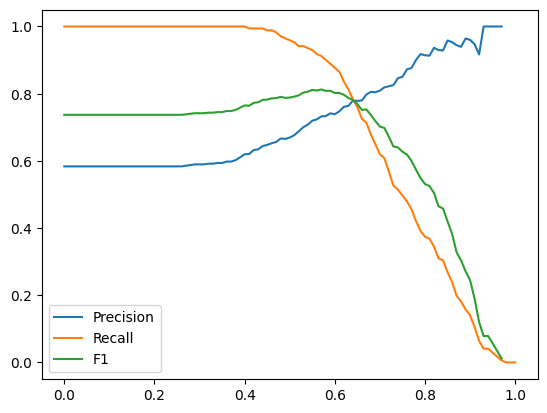

In [38]:
plt.plot(df_scores.threshold, df_scores['pr'], label='Precision')
plt.plot(df_scores.threshold, df_scores['re'], label='Recall')
plt.plot(df_scores.threshold, df_scores['F1'], label='F1')
plt.legend()

In [63]:
max_F1= max(df_scores['F1'])
print('%.3f %.3f' % (t, max_F1))

1.000 0.812


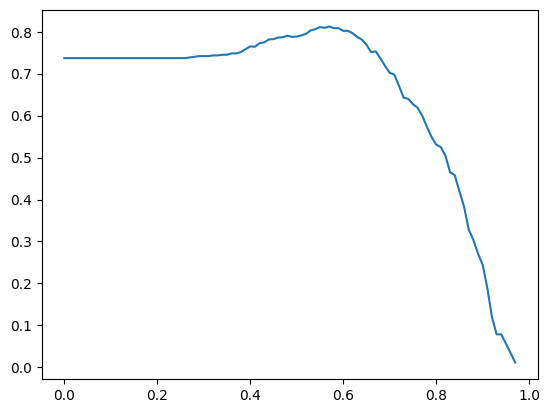

In [39]:
plt.plot(df_scores.threshold, df_scores['F1'], label='F1')

In [1]:
!pip install tqdm


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
from tqdm.auto import tqdm

In [50]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=10000)
    model.fit(X_train, y_train)
    
    return dv, model

In [51]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [52]:
y_pred = predict(df_val, dv, model)

In [53]:
from sklearn.model_selection import KFold

In [54]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.converted
        y_val = df_val.converted

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.867 +- 0.029
C=0.01 0.831 +- 0.034
C=0.1 0.823 +- 0.035
C=0.5 0.822 +- 0.036
C=1 0.822 +- 0.036
C=5 0.822 +- 0.036
C=10 0.822 +- 0.036
